![example](images/director_shot.jpeg)

# Microsoft Movie Analysis



## Overview

Our main objective of this project is to analyse and help microsoft studio to enter the movie industry. Our analysis includes on various data such as budget, net gross, runtime, genres and so on. Using these datas, we do analysis on various aspects and help microsoft to create a successful movie.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. Based on our analysis, we help them to start a successful movie studio. 

## Data Understanding

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
%matplotlib inline

Our first step is to import all the standard packages and load the csv file using pandas and store them as a dataframe.

In [2]:
#Use pandas to load the csv file and store it as dataframe
title_df = pd.read_csv('data/zippeddata/imdb.title.basics.csv.gz')
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#Use pandas to load the csv file and store it as dataframe
rating_df = pd.read_csv('data/zippeddata/imdb.title.ratings.csv.gz')
rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
#Use pandas to load the csv file and store it as dataframe
budget_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#Use pandas to load the csv file and store it as dataframe
movie_gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation

### Data Cleaning

We have to clean the data before performing analysis. Check for the null values.

In the budget dataframe 'domestic_gross','production_budget' and 'worldwide_gross' are as type object.Convert them as float and the column 'release_date to datetime object. 

In [6]:
# Remove separator using replace function
budget_df['production_budget'].str.replace(',', '')

0       $425000000
1       $410600000
2       $350000000
3       $330600000
4       $317000000
           ...    
5777         $7000
5778         $6000
5779         $5000
5780         $1400
5781         $1100
Name: production_budget, Length: 5782, dtype: object

In [7]:
# Remove the $ symbol using split fuction
budget_df['production_budget'].str.replace(',', '').str.split('$')

0       [, 425000000]
1       [, 410600000]
2       [, 350000000]
3       [, 330600000]
4       [, 317000000]
            ...      
5777         [, 7000]
5778         [, 6000]
5779         [, 5000]
5780         [, 1400]
5781         [, 1100]
Name: production_budget, Length: 5782, dtype: object

In [8]:
 # Select the required value by using lambda function
budget_df['production_budget'].str.replace(',', '').str.split('$').map(lambda x:x[1])

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [9]:
budget_df['production_budget'] = budget_df['production_budget'].str.replace(',', '').str.split('$').map(lambda x:x[1])

In [10]:
# Check for the float values
budget_df['production_budget'].str.contains('.').sum()

5782

In [11]:
# convert to float
budget_df['production_budget'] = budget_df['production_budget'].astype(float)

Repeat the above process for 'domestic gross' and 'worldwide gross'

In [12]:
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(',','').str.split('$').map(lambda x:x[1])

In [13]:
budget_df['domestic_gross'] = budget_df['domestic_gross'].astype(float)

In [14]:
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(',','').str.split('$').map(lambda x:x[1])

In [15]:
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype(float)

In [16]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [17]:
# convert 'release_date' to datetime object.
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

In [18]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Now we are creatring a month column and year column.

In [19]:
# create 'month' column
budget_df['month'] = budget_df['release_date'].dt.month

In [20]:
# create 'year' column
budget_df['year'] = budget_df['release_date'].dt.year

In [21]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017


There are missing values in Studio, domestic_gross and foreign_gross.

In [22]:
# checking for the null values
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [23]:
# checking for the average number of null values
movie_gross_df['foreign_gross'].isna().sum()/len(movie_gross_df)

0.3985828166519043

In [24]:
#drop the null values in studio.
movie_gross_df.dropna(subset= ['studio']).head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
#drop the null values in domestic_gross
movie_gross_df.dropna(subset = ['domestic_gross'],axis=0, inplace=True)

In [26]:
#drop the null values in foreign_gross
movie_gross_df.dropna(subset = ['foreign_gross'],axis=0, inplace=True)

In [27]:
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'],errors = 'coerce')

In [28]:
#convert the domestic_gross value as float
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].replace('$','').astype(float)

In [29]:
#convert the foreign_gross value as float
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].replace('$','').astype(float)

In [30]:
movie_gross_df['total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']

I have made my analysis based on these questions.

- Which Studio has gained more gross value?
- Which movie genres are most commonly produced and have higher rating?
- What is the best time of the year to release a movie?

### Studio Gross Analysis

In [31]:
#performing the average value for studio total_gross
movie_gross_df.groupby('studio')['total_gross'].mean()

studio
3D       1.600000e+07
A24      2.625889e+07
AF       2.327500e+06
AGF      1.768000e+05
AR       5.805000e+07
             ...     
WOW      4.940000e+04
Wein.    5.936091e+07
Yash     4.920575e+07
Zee      1.671000e+06
Zeit.    4.405840e+06
Name: total_gross, Length: 172, dtype: float64

In [32]:
#sort values by total_gross
movie_gross_df.sort_values(by= 'total_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross
721,To Die Like a Man,Strand,4000.0,900.0,2011,4900.0
715,Aurora,CGld,5700.0,5100.0,2011,10800.0
1110,Cirkus Columbia,Strand,3500.0,9500.0,2012,13000.0
322,The Thorn in the Heart,Osci.,7400.0,10500.0,2010,17900.0
711,I'm Glad My Mother is Alive,Strand,8700.0,13200.0,2011,21900.0
...,...,...,...,...,...,...
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015,NaN
1873,Jurassic World,Uni.,652300000.0,NaN,2015,NaN
1874,Furious 7,Uni.,353000000.0,NaN,2015,NaN
2760,The Fate of the Furious,Uni.,226000000.0,NaN,2017,NaN


In [33]:
#average value of each studio
movie_gross_studios = movie_gross_df.groupby('studio').mean()

In [34]:
movie_gross_studios.head()

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
3D,6.100000e+06,9.900000e+06,2010.000000,1.600000e+07
A24,1.370825e+07,1.255064e+07,2015.473684,2.625889e+07
AF,5.775000e+05,1.750000e+06,2012.000000,2.327500e+06
AGF,1.580000e+04,1.610000e+05,2011.000000,1.768000e+05
AR,3.500000e+05,5.770000e+07,2016.000000,5.805000e+07


In [35]:
x = movie_gross_studios = movie_gross_studios.sort_values(by='total_gross',ascending=True)

In [36]:
#total gross income in millions
y= movie_gross_studios['total_gross_m'] = movie_gross_studios['total_gross']/1000000

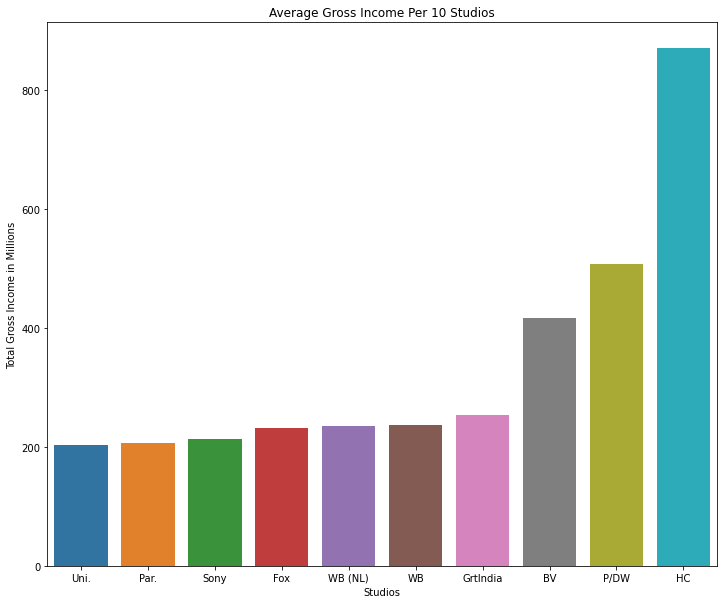

In [37]:
# Create a bar plot studio vs total gross income in millions
fig,ax = plt.subplots(figsize=(12,10))
sns.barplot(x=movie_gross_studios.index[-10:],y=movie_gross_studios['total_gross_m'][-10:])
#set title for x-axis
ax.set_xlabel('Studios')
#set title for y-axis
ax.set_ylabel('Total Gross Income in Millions')
#set plot title
ax.set_title('Average Gross Income Per 10 Studios')
plt.savefig("./images/studio_profit_analysis.png")
plt.show()

HC, P/DW,BV are the top 3 studios with over 400 million dollars average gross income.

### Data Merging

Columns 'runtime_minutes' and 'genres' contains null values.

In [38]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [39]:
# checking for the null values
title_df['runtime_minutes'].isna().sum()

31739

In [40]:
# checking for the average number of null vales
title_df['runtime_minutes'].isna().sum() / len(title_df)

0.21717620976571053

In [41]:
# since it has fewer null values, drop the rows 
title_df.dropna(subset = ['runtime_minutes'], axis = 0, inplace = True)

In [42]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [43]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           114405 non-null  object 
 1   primary_title    114405 non-null  object 
 2   original_title   114401 non-null  object 
 3   start_year       114405 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [44]:
# checking for the null values in 'genre' column
title_df['genres'].isna().sum()

2172

In [45]:
# checking for the average number of null values
title_df['genres'].isna().sum() / len(title_df)

0.01898518421397666

In [46]:
# since it has fewer null values, drop the rows 
title_df.dropna(subset = ['genres'], axis = 0, inplace = True)

In [47]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112233 non-null  object 
 1   primary_title    112233 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112233 non-null  int64  
 4   runtime_minutes  112233 non-null  float64
 5   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB




Before merging the data,We need to check for the duplicates.

In [48]:
#checking for duplicates
title_df[title_df.duplicated(subset = ['primary_title'], keep = False)].sort_values(by = 'primary_title').iloc[10:20]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
21003,tt1869226,100% Love,100% Love,2011,141.0,"Comedy,Drama,Romance"
107804,tt6322270,12,12,2019,100.0,"Comedy,Drama"
125029,tt7608274,12,12,2017,104.0,"Drama,Romance"
137603,tt8824500,17 Seconds,17 Seconds,2018,85.0,"Documentary,Sport"
57071,tt3328724,17 Seconds,17 Seconds,2013,53.0,Sport
24370,tt1982848,18 Days,Tamantashar Yom,2011,125.0,Drama
122213,tt7385874,18 Days,18 Days,2017,92.0,Romance
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama"
20394,tt1855110,180,180,2011,121.0,"Drama,Romance"
66370,tt3781762,1915,1915,2015,82.0,Drama


There are movies with same title released on different years.

In [49]:
# checking for the title with year column
title_df[title_df.duplicated(subset = ['primary_title', 'start_year'],keep = False)].sort_values(by = 'primary_title').iloc[10:20]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
135287,tt8558372,3,3,2018,17.0,Documentary
29202,tt2123129,3,3,2012,145.0,"Drama,Mystery,Romance"
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
30089,tt2148554,41,41,2012,98.0,Documentary
35991,tt2319739,41,41,2012,80.0,"Drama,Sci-Fi"
143987,tt9614898,44 Days,44 Days,2018,76.0,"Drama,War"
142077,tt9331072,44 Days,44 Days,2018,52.0,Mystery
104504,tt6111436,88,88,2016,102.0,Documentary


There are movies having same name and release year but different runtimes.

In [50]:
title_df[title_df.duplicated(subset = ['primary_title','start_year','runtime_minutes'], keep = False)].sort_values(by = 'primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
...,...,...,...,...,...,...
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [51]:
# removing duplicates having same title,year and runtime
title_df.drop_duplicates(subset = ['primary_title','start_year','runtime_minutes'], inplace = True)

Both the dataframe 'title' and 'rating' has unique id 'tconst'.Merging the two dataframe on 'tconst' using inner join.

In [52]:
#merging the dataframe title_df and rating_df
df = title_df.merge(rating_df, on = 'tconst',how = 'inner')

In [53]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 0 to 65695
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65696 non-null  object 
 1   primary_title    65696 non-null  object 
 2   original_title   65696 non-null  object 
 3   start_year       65696 non-null  int64  
 4   runtime_minutes  65696 non-null  float64
 5   genres           65696 non-null  object 
 6   averagerating    65696 non-null  float64
 7   numvotes         65696 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [55]:
#renaming the column name of 'df' dataframe to match with 'budget' dataframe for merging 
df.rename(columns = {'primary_title':'movie', 'start_year':'year'}, inplace = True)

Now merge the dataframe 'df' with 'budget_df'.They share the common column name 'movie' and 'year'. 

In [56]:
# merging 'df' and 'budget' using left join on 'title' and 'year' columns
movie_analysis_df = pd.merge(df, budget_df, on = ['movie', 'year'], how = 'left')

In [57]:
movie_analysis_df.head()

,tconst,movie,original_title,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,NaN,NaN,NaN
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,NaN,NaN,NaN


In [58]:
# removing original title as it contains same title name in different languages for some movies.
movie_analysis_df.drop('original_title', axis = 1, inplace = True)

In [59]:
movie_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 0 to 65695
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             65696 non-null  object        
 1   movie              65696 non-null  object        
 2   year               65696 non-null  int64         
 3   runtime_minutes    65696 non-null  float64       
 4   genres             65696 non-null  object        
 5   averagerating      65696 non-null  float64       
 6   numvotes           65696 non-null  int64         
 7   id                 1488 non-null   float64       
 8   release_date       1488 non-null   datetime64[ns]
 9   production_budget  1488 non-null   float64       
 10  domestic_gross     1488 non-null   float64       
 11  worldwide_gross    1488 non-null   float64       
 12  month              1488 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory 

### Genre Analysis 

In [60]:
movie_analysis_df.head()

,tconst,movie,year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,month
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,NaN,NaN,NaN
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,NaN,NaN,NaN


In [61]:
# genre column needs to be formatted in order to start analysing on genres
genres_list = movie_analysis_df['genres'].str.split(',')

In [62]:
# creating empty list to add all genres
categories = []
for category in genres_list:
    for n in category:
        categories.append(n)

In [63]:
categories[1:10]

['Crime',
 'Drama',
 'Biography',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Fantasy',
 'Adventure']

In [64]:
# removing duplicates by using 'set' function
genres_list_data =list(set(categories))

In [65]:
genres_list_data

['Action',
 'Thriller',
 'Family',
 'Comedy',
 'Animation',
 'History',
 'Romance',
 'Western',
 'Short',
 'News',
 'Reality-TV',
 'Adventure',
 'Music',
 'Adult',
 'War',
 'Musical',
 'Sport',
 'Biography',
 'Game-Show',
 'Sci-Fi',
 'Drama',
 'Horror',
 'Fantasy',
 'Documentary',
 'Mystery',
 'Crime']

In [66]:
genres_list_data = sorted(genres_list_data)

In [67]:
genres_list_data

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [68]:
#total of genre_list_data
len(genres_list_data)

26

In [69]:
# creating a genre dataframe
genres_df = pd.DataFrame(genres_list)

In [70]:
genres_df.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama, Fantasy]"
4,"[Adventure, Animation, Comedy]"


In [71]:
# pass in value '0' to all the columns in 'genres_df' dataframe
for value in genres_list_data:
    genres_df[value] = 0

In [72]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Adventure, Animation, Comedy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
warnings.filterwarnings("ignore")
# adding 1 to columns which is present in genre category.
for value in genres_df.index:
    for genre in genres_list_data:
        if genre in genres_df['genres'][value]:
            genres_df[genre][value] = 1

In [74]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Adventure, Animation, Comedy]",0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now merging 'genres_df' with 'movie_analysis_df' on index

In [75]:
#merging genres_df and movie_analysis_df on index
movie_df = pd.merge(movie_analysis_df, genres_df, left_index = True, right_index = True)

In [76]:
movie_df.head()

,tconst,movie,year,runtime_minutes,genres_x,averagerating,numvotes,id,release_date,production_budget,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,NaN,NaT,NaN,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#checking for the columns of movie_df 
movie_df.columns

Index(['tconst', 'movie', 'year', 'runtime_minutes', 'genres_x',
       'averagerating', 'numvotes', 'id', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'month', 'genres_y', 'Action',
       'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [78]:
# removing columns that are not needeed.
movie_df = movie_df.drop(['numvotes', 'id', 'release_date', 'genres_y'], axis = 1)

In [79]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 0 to 65695
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             65696 non-null  object 
 1   movie              65696 non-null  object 
 2   year               65696 non-null  int64  
 3   runtime_minutes    65696 non-null  float64
 4   genres_x           65696 non-null  object 
 5   averagerating      65696 non-null  float64
 6   production_budget  1488 non-null   float64
 7   domestic_gross     1488 non-null   float64
 8   worldwide_gross    1488 non-null   float64
 9   month              1488 non-null   float64
 10  Action             65696 non-null  int64  
 11  Adult              65696 non-null  int64  
 12  Adventure          65696 non-null  int64  
 13  Animation          65696 non-null  int64  
 14  Biography          65696 non-null  int64  
 15  Comedy             65696 non-null  int64  
 16  Crime              656

In [80]:
# find the genre of movie with high rating over past years
high_rating_df = movie_df[movie_df['averagerating'] > 7.5]
high_rating_df.head()

,tconst,movie,year,runtime_minutes,genres_x,averagerating,production_budget,domestic_gross,worldwide_gross,month,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10,tt0176694,The Tragedy of Man,2011,160.0,"Animation,Drama,History",7.8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
12,tt0230212,The Final Journey,2010,120.0,Drama,8.8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
16,tt0262218,Akakis mogzauroba,2012,44.0,Documentary,7.8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# selecting all genre columns
high_rating_df.iloc[:,10:].head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# sum up those genre values
high_rating_df.iloc[:,10:].sum()

Action          736
Adult             0
Adventure       665
Animation       252
Biography      1322
Comedy         1932
Crime           564
Documentary    6941
Drama          4694
Family          672
Fantasy         218
Game-Show         1
History         953
Horror          207
Music           700
Musical         171
Mystery         340
News            229
Reality-TV        5
Romance         662
Sci-Fi          139
Short             1
Sport           370
Thriller        630
War             182
Western          32
dtype: int64

In [83]:
# sort the movies with high ratings
high_rating_df.iloc[:, 10:].sum().sort_values(ascending = False)

Documentary    6941
Drama          4694
Comedy         1932
Biography      1322
History         953
Action          736
Music           700
Family          672
Adventure       665
Romance         662
Thriller        630
Crime           564
Sport           370
Mystery         340
Animation       252
News            229
Fantasy         218
Horror          207
War             182
Musical         171
Sci-Fi          139
Western          32
Reality-TV        5
Game-Show         1
Short             1
Adult             0
dtype: int64

In [84]:
# select top 5 genre values
high_rating_df.iloc[:, 10:].sum().sort_values(ascending = False).head()

Documentary    6941
Drama          4694
Comedy         1932
Biography      1322
History         953
dtype: int64

In [85]:
# storing those index values with new variable.
high_rating_genres = high_rating_df.iloc[:, 10:].sum().sort_values(ascending = False).head().index.values

In [86]:
high_rating_genres

array(['Documentary', 'Drama', 'Comedy', 'Biography', 'History'],
      dtype=object)

Grouping the data with year to get the high rated genres for last 10 years

In [87]:
# selecting dataframe from 'year' column
high_rating_df.iloc[:, 2:].head()

,year,runtime_minutes,genres_x,averagerating,production_budget,domestic_gross,worldwide_gross,month,Action,Adult,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
4,2017,83.0,"Adventure,Animation,Comedy",8.1,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2013,180.0,Documentary,7.6,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2011,160.0,"Animation,Drama,History",7.8,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2010,120.0,Drama,8.8,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2012,44.0,Documentary,7.8,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# group by 'year' and add the values
high_rating_df.iloc[:, 2:].groupby(by = 'year').sum()

,runtime_minutes,averagerating,production_budget,domestic_gross,worldwide_gross,month,Action,Adult,Adventure,Animation,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
2010,94228.0,8793.1,1.158800e+09,2.146083e+09,5.105128e+09,145.0,56,0,59,18,...,26,23,0,52,4,0,32,43,22,3
2011,106925.0,10048.0,5.121900e+08,8.566976e+08,1.829434e+09,95.0,63,0,59,18,...,32,28,0,57,11,0,39,50,19,4
2012,109691.0,10218.9,1.494800e+09,2.554258e+09,7.127027e+09,151.0,71,0,77,19,...,29,35,0,63,4,0,31,53,19,5
2013,114183.0,10645.7,9.493000e+08,1.330710e+09,3.634095e+09,170.0,68,0,75,21,...,35,36,1,74,13,0,44,66,13,2
2014,134109.0,12169.7,1.674700e+09,2.658744e+09,7.356104e+09,193.0,96,0,86,28,...,43,56,1,82,13,0,43,75,27,8
2015,127394.0,11626.2,9.219000e+08,1.564681e+09,3.717844e+09,172.0,73,0,74,26,...,36,39,2,58,7,0,44,72,11,1
2016,141618.0,12937.6,1.039500e+09,2.573886e+09,6.338237e+09,135.0,96,0,81,40,...,36,6,1,79,23,0,48,70,19,2
2017,151292.0,13587.8,1.054000e+09,1.789231e+09,4.744870e+09,118.0,93,0,69,38,...,48,4,0,94,22,0,42,72,27,2
2018,138788.0,12015.2,7.330000e+08,2.188567e+09,5.805065e+09,61.0,84,0,63,30,...,38,1,0,70,27,1,38,88,19,4


In [89]:
# selecting only the top 5 genres based on year. 2018 and 2019 have less data and select till 2017.
genre_year =high_rating_df.iloc[:, 2:].groupby(by = 'year').sum().loc['2010':'2017',high_rating_genres]

In [90]:
genre_year

,Documentary,Drama,Comedy,Biography,History
year,,,,,
2010,656,350,171,129,87
2011,713,408,188,133,96
2012,722,428,191,154,126
2013,745,529,197,172,127
2014,822,603,225,235,153
2015,844,493,182,177,124
2016,849,520,224,123,88
2017,804,588,227,104,80


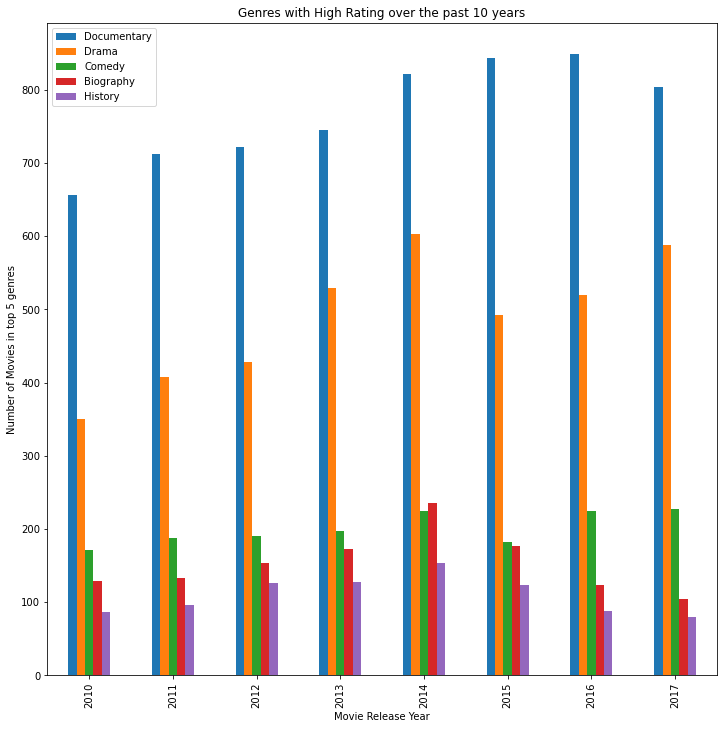

In [91]:
# Create bar Plot
ax=genre_year.plot(kind = 'bar', figsize = (12,12),legend = True)
ax.set_title('Genres with High Rating over the past 10 years') 
# set title for x-axis
ax.set_xlabel("Movie Release Year")
# set title for y-axis
ax.set_ylabel("Number of Movies in top 5 genres")
plt.legend(loc="upper left")
plt.savefig("./images/genre_analysis.png")
plt.show()

From the above bar chart Documentry, Drama and Comedy are the most successful genre with high ratings in the past 10 years. we can also see that biography has a desirable rating along with history. 

### Domestic Gross Analysis

In [92]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65696 entries, 0 to 65695
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             65696 non-null  object 
 1   movie              65696 non-null  object 
 2   year               65696 non-null  int64  
 3   runtime_minutes    65696 non-null  float64
 4   genres_x           65696 non-null  object 
 5   averagerating      65696 non-null  float64
 6   production_budget  1488 non-null   float64
 7   domestic_gross     1488 non-null   float64
 8   worldwide_gross    1488 non-null   float64
 9   month              1488 non-null   float64
 10  Action             65696 non-null  int64  
 11  Adult              65696 non-null  int64  
 12  Adventure          65696 non-null  int64  
 13  Animation          65696 non-null  int64  
 14  Biography          65696 non-null  int64  
 15  Comedy             65696 non-null  int64  
 16  Crime              656

In [93]:
# Domestic Gross value analysis, remove null values.
gross_df = movie_df.dropna(subset = ['domestic_gross'], axis = 0)

In [94]:
gross_df.head()

,tconst,movie,year,runtime_minutes,genres_x,averagerating,production_budget,domestic_gross,worldwide_gross,month,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
14,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,45000000.0,0.0,7.370600e+04,12.0,...,0,0,0,0,0,0,0,0,0,0
34,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,91000000.0,58236838.0,1.878612e+08,12.0,...,0,0,0,0,0,0,0,0,0,0
38,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,28000000.0,26017685.0,6.210859e+07,9.0,...,0,0,0,0,0,0,0,0,0,0
39,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,215000000.0,652270625.0,1.648855e+09,6.0,...,0,0,0,0,1,0,0,0,0,0
41,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,45000000.0,13109815.0,2.154473e+07,10.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
gross_df['domestic_gross'].describe()

count    1.488000e+03
mean     5.674435e+07
std      8.512833e+07
min      0.000000e+00
25%      3.246476e+06
50%      2.795831e+07
75%      6.794762e+07
max      7.000596e+08
Name: domestic_gross, dtype: float64

In [96]:
#check for the unique months
gross_df['month'].nunique()

12

In [97]:
# performing average domestic gross based on months.
month_df = gross_df[['domestic_gross', 'month']].groupby(by = 'month').mean()
month_df

,domestic_gross
month,
1.0,3.872589e+07
2.0,6.395913e+07
3.0,6.844534e+07
4.0,5.913722e+07
5.0,9.067067e+07
6.0,9.021356e+07
7.0,7.091756e+07
8.0,4.262383e+07
9.0,2.977247e+07


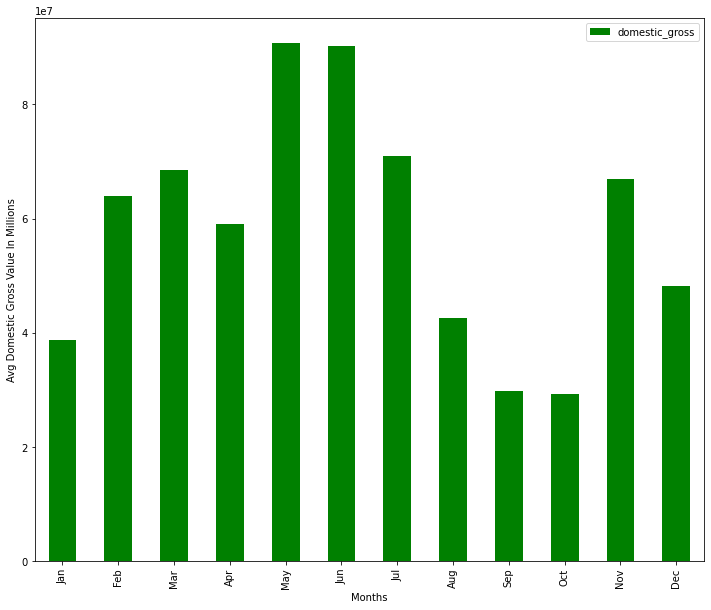

In [98]:
# create bar plot and set figure size.
ax = month_df.plot(kind = 'bar', figsize = (12, 10), color='g')
# set x label
ax.set_xlabel('Months')
# set y label
ax.set_ylabel('Avg Domestic Gross Value In Millions')
# modifying the x label from numbers to name of the month.
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.savefig("./images/month_analysis.png")
plt.show()

Movies released in the month of 'May' and 'June' has made higher Domestic Gross compared to other months of the year.

## Conclusion

While there are many other factors that we could consider in a future analysis we feel that the following conclusions will result in a successful business venture as Microsoft enters the movie industry.

- HC,P/DW,BV are the top three competitors.
- We recommend that Microsoft should focus their efforts on the top 5 most rated movie genres: Documentry, Drama, Comedy, Biography and History. 
- We recommend that Microsoft release their movies, during the summer months. Drama and Comedy movies would see similar success if released in November, but the recommendation remains to focus on summer.
- We recommend that Microsoft take into consideration the rating of the movie based on the genre and target audience. 

## Next Step

Apart from our findings, there are various other factors to be considered too for a successful movie.

- WE recommend to focus on the production budget which helps us to gain profit with high ratings.
- We recoomend to work on the runtime/length of the movie to see the difference between runtime of a short, average or long movie have impact on ratings. 
- We recommend to analysis the crew, which actor has given the successful movie.
- we also recommend to analysis the director crew and see which director has given the most successful movies.